In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics as metrics
import pathlib
import os
import cv2 as cv
import random
from rembg import remove

In [3]:
#uncomment to download the data
# dataset_url = "https://data.caltech.edu/records/65de6-vp158/files/CUB_200_2011.tgz"
# tf.keras.utils.get_file('caltech_birds2011.tgz', origin=dataset_url, extract=True)
data_dir = pathlib.Path("/home/user/.keras/datasets/CUB_200_2011/images") #this should now contain the birds with removed backgrounds

In [ ]:
#warning - ran for about 2.5 hours
for root, _, files in os.walk(data_dir):
    print(root)
    for file in files:
        path = root + "/"+ file
        image = Image.open(path)
        image = remove(image)
        image = image.convert('RGB')
        image.save(path)

In [ ]:
#find the smallest dimensions
min_height = 180
min_width = 180
count = 0

for root, _, files in os.walk(data_dir):
    #print(root)
    for file in files:
        path = root + "/"+ file
        image = cv.imread(path)
        height, width, _ = image.shape
        if height < min_height and width < min_width:
            count += 1

count

In [ ]:
#resize all images to 180

In [4]:
#split into training set (approx. 80%), validation set (approx. 10%), and a test set (approx. 10%). 
#Also, perform some data augmentation - for each image, create 3 new images by random rotations
#I will play with this more later if necessary
#uncomment to do this on your machine - takes a minute or 2 - would just recommnend loading it with joblib

i = -2
train = []
valid = []
test = []
for root, _, files in os.walk(data_dir):
    print(root)
    i+=1
    for file in files:
        path = root + "/"+ file
        image = Image.open(path)
        im1 = np.array(image.rotate(random.randint(1, 359)).resize((180,180)))
        im2 = np.array(image.rotate(random.randint(1, 359)).resize((180,180)))
        im3 = np.array(image.rotate(random.randint(1, 359)).resize((180,180)))
        image = np.array(image.resize((180,180)))
        n = random.randint(1, 10)
        if n == 10:
            test.append((image,i))
            test.append((im1,i))
            test.append((im2,i))
            test.append((im3,i))
        elif n == 9:
            valid.append((image,i))
            valid.append((im1,i))
            valid.append((im2,i))
            valid.append((im3,i))
        else:
            train.append((image,i))
            train.append((im1,i))
            train.append((im2,i))
            train.append((im3,i))

/home/user/.keras/datasets/CUB_200_2011/images
/home/user/.keras/datasets/CUB_200_2011/images/082.Ringed_Kingfisher
/home/user/.keras/datasets/CUB_200_2011/images/130.Tree_Sparrow
/home/user/.keras/datasets/CUB_200_2011/images/125.Lincoln_Sparrow
/home/user/.keras/datasets/CUB_200_2011/images/039.Least_Flycatcher
/home/user/.keras/datasets/CUB_200_2011/images/033.Yellow_billed_Cuckoo
/home/user/.keras/datasets/CUB_200_2011/images/199.Winter_Wren
/home/user/.keras/datasets/CUB_200_2011/images/136.Barn_Swallow
/home/user/.keras/datasets/CUB_200_2011/images/164.Cerulean_Warbler
/home/user/.keras/datasets/CUB_200_2011/images/050.Eared_Grebe
/home/user/.keras/datasets/CUB_200_2011/images/064.Ring_billed_Gull
/home/user/.keras/datasets/CUB_200_2011/images/140.Summer_Tanager
/home/user/.keras/datasets/CUB_200_2011/images/150.Sage_Thrasher
/home/user/.keras/datasets/CUB_200_2011/images/108.White_necked_Raven
/home/user/.keras/datasets/CUB_200_2011/images/114.Black_throated_Sparrow
/home/user/.

In [5]:
len(train)

37716

In [6]:
len(valid)

4716

In [7]:
len(test)

4720

In [12]:
4*11788

47152

In [5]:
len(test)+len(valid)+len(train)

47152

In [5]:
random.shuffle(train)
random.shuffle(valid)
random.shuffle(test)

In [6]:
train_images = [t[0] for t in train]
train_labels = [t[1] for t in train]
valid_images = [t[0] for t in valid]
valid_labels = [t[1] for t in valid]
test_images = [t[0] for t in test]
test_labels = [t[1] for t in test]

In [7]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

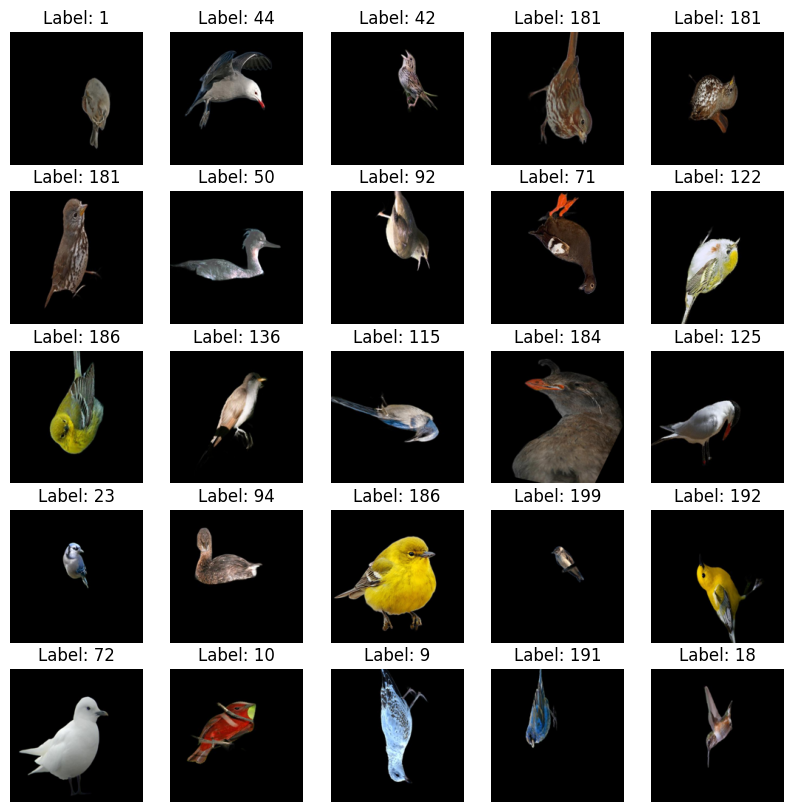

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap = "viridis")  # Remove the extra dimension with squeeze()
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [9]:
#save not standardized
folder = "/home/user/Documents/St.Olaf/Csci379/karase1/project_02/python_data_objects/"
from joblib import dump
dump(train_images, folder+'train_images_not_standardized.joblib')
dump(train_labels, folder+'train_labels_not_standardized.joblib')
dump(valid_images, folder+'valid_images_not_standardized.joblib')
dump(valid_labels, folder+'valid_labels_not_standardized.joblib')
dump(test_images, folder+'test_images_not_standardized.joblib')
dump(test_labels, folder+'test_labels_not_standardized.joblib')

['/home/user/Documents/St.Olaf/Csci379/karase1/project_02/python_data_objects/test_labels_not_standardized.joblib']

In [10]:
#Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=200)
valid_labels = tf.keras.utils.to_categorical(valid_labels, num_classes=200)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=200)

In [16]:
len(train_labels[657])

200

In [ ]:
#the steps below did not work well, they clogged up my machine, I had to increase my swap space to 80GBs

In [9]:
#Normalize pixel values to be in the range [0, 1]
train_images, valid_images, test_images = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [11]:
#Z-score Standardization
mean = train_images.mean()
std = train_images.std()

In [12]:
train_images = (train_images - mean) / std
valid_images = (valid_images - mean) / std
test_images = (test_images - mean) / std

In [13]:
folder = "/home/user/Documents/St.Olaf/Csci379/karase1/project_02/python_data_objects/"
from joblib import dump
dump(train_images, folder+'train_images.joblib')
dump(train_labels, folder+'train_labels.joblib')
dump(valid_images, folder+'valid_images.joblib')
dump(valid_labels, folder+'valid_labels.joblib')
dump(test_images, folder+'test_images.joblib')
dump(test_labels, folder+'test_labels.joblib')

['/home/user/Documents/St.Olaf/Csci379/karase1/project_02/python_data_objects/test_labels.joblib']